In [1]:
import pandas as pd
import numpy as np 
import os
import matplotlib.pyplot as plt
from IPython.display import display as dp


In [2]:
carpeta='docs'
customer_rute=os.path.join(carpeta,'customers.csv')
orderitems_rute=os.path.join(carpeta,'order_items.csv')
orders_rute=os.path.join(carpeta,'orders.csv')
products_rute=os.path.join(carpeta,'products.csv')

In [3]:
#EXTRACCION DATA
customer=pd.read_csv(customer_rute)
order_items=pd.read_csv(orderitems_rute)
orders=pd.read_csv(orders_rute)
products=pd.read_csv(products_rute)

In [4]:
dp(customer.head())

,customer_id,name,email,signup_date,country
0,CUST0000,Customer_0,user0@example.com,2022-04-13,Colombia
1,CUST0001,Customer_1,user1@example.com,2023-03-12,Mexico
2,CUST0002,Customer_2,user2@example.com,2022-09-28,Mexico
3,CUST0003,Customer_3,user3@example.com,2022-04-17,Mexico
4,CUST0004,Customer_4,user4@example.com,2022-03-13,Colombia


In [5]:
dp(order_items.head())

,order_id,product_id,category,product_name,quantity,unit_price,discount
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5


In [6]:
dp(orders.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
0,ORD00000,CUST0176,2023-01-07,Cancelled,10.23,Bank Transfer,0.00
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77


In [7]:
dp(products.head())

,product_id,category,product_name,cost_price,supplier
0,PROD1000,Electronics,Electronics_Product_0,51.13,Supplier_3
1,PROD1001,Electronics,Electronics_Product_1,66.94,Supplier_9
2,PROD1002,Electronics,Electronics_Product_2,21.71,Supplier_4
3,PROD1003,Electronics,Electronics_Product_3,27.54,Supplier_5
4,PROD1004,Electronics,Electronics_Product_4,21.99,Supplier_8


In [8]:
#FILTRAR  PEDIDOS COMPLETADOS
completed_orders= orders[orders['order_status']=='Completed']

#UNIR CON ORDERS_ITEMS
merged= pd.merge(order_items,completed_orders, on='order_id', how='inner')

#UNIR CON LOS PRODUCTS
merged=pd.merge(merged,products[['product_id','cost_price']], on='product_id',how='left')

In [9]:
dp(merged)

,order_id,product_id,category,product_name,quantity,unit_price,discount,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount,cost_price
0,ORD00001,PROD1238,Books,Books_Product_39,3,41.94,10,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,28.21
1,ORD00001,PROD1164,Toys,Toys_Product_2,3,121.19,5,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,98.79
2,ORD00001,PROD1235,Books,Books_Product_36,2,118.18,15,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54,60.72
3,ORD00002,PROD1219,Books,Books_Product_20,2,27.19,15,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19,22.53
4,ORD00003,PROD1073,Clothing,Clothing_Product_23,1,70.06,5,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77,52.80
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3210,ORD01498,PROD1157,Home,Home_Product_45,1,166.19,10,CUST0073,2023-05-29,Completed,7.40,Credit Card,837.94,83.14
3211,ORD01498,PROD1172,Toys,Toys_Product_10,3,121.66,5,CUST0073,2023-05-29,Completed,7.40,Credit Card,837.94,99.68
3212,ORD01498,PROD1007,Electronics,Electronics_Product_7,3,95.77,0,CUST0073,2023-05-29,Completed,7.40,Credit Card,837.94,56.54
3213,ORD01499,PROD1223,Books,Books_Product_24,1,24.64,5,CUST0127,2023-08-25,Completed,10.35,PayPal,366.88,17.65


In [10]:
#CALCULOS PARA SACAR INGRESO POR GRUPO
merged['ingreso_bruto']=merged['unit_price'] * merged['quantity']

merged['descuento']=merged['unit_price'] * merged['discount'] / 100 * merged['quantity']

merged['costo']=merged['cost_price'] * merged['quantity']

In [11]:
dp(merged[['category','ingreso_bruto','descuento','costo','shipping_cost']])

,category,ingreso_bruto,descuento,costo,shipping_cost
0,Books,125.82,12.5820,84.63,4.00
1,Toys,363.57,18.1785,296.37,4.00
2,Books,236.36,35.4540,121.44,4.00
3,Books,54.38,8.1570,45.06,4.97
4,Clothing,70.06,3.5030,52.80,14.37
...,...,...,...,...,...
3210,Home,166.19,16.6190,83.14,7.40
3211,Toys,364.98,18.2490,299.04,7.40
3212,Electronics,287.31,0.0000,169.62,7.40
3213,Books,24.64,1.2320,17.65,10.35


In [12]:
#AGRUPAR POR CATEGORIA
resumen_categoria=merged.groupby('category').agg({
    'ingreso_bruto':'sum',
    'costo':'sum',
    'descuento':'sum',
    'shipping_cost':'sum'
})

In [13]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost
category,,,,
Books,94874.19,59183.62,4498.6240,5768.04
Clothing,144331.85,89073.52,6937.8845,7066.00
Electronics,100475.05,63623.44,4391.0320,5624.34
Home,107704.97,66308.00,4836.3210,5582.88
Toys,84057.09,53371.92,3574.2415,3634.55


In [14]:
resumen_categoria['ingreso_neto']=resumen_categoria['ingreso_bruto']-resumen_categoria['costo']-resumen_categoria['descuento']-resumen_categoria['shipping_cost']
resumen_categoria['formatedo_incomeneto']=resumen_categoria['ingreso_neto'].apply(lambda x: f'${x:,.2f}')

In [15]:
dp(resumen_categoria)

,ingreso_bruto,costo,descuento,shipping_cost,ingreso_neto,formatedo_incomeneto
category,,,,,,
Books,94874.19,59183.62,4498.6240,5768.04,25423.9060,"$25,423.91"
Clothing,144331.85,89073.52,6937.8845,7066.00,41254.4455,"$41,254.45"
Electronics,100475.05,63623.44,4391.0320,5624.34,26836.2380,"$26,836.24"
Home,107704.97,66308.00,4836.3210,5582.88,30977.7690,"$30,977.77"
Toys,84057.09,53371.92,3574.2415,3634.55,23476.3785,"$23,476.38"


In [16]:
resumen_categoria=resumen_categoria.reset_index()

In [17]:
dp(resumen_categoria)

,category,ingreso_bruto,costo,descuento,shipping_cost,ingreso_neto,formatedo_incomeneto
0,Books,94874.19,59183.62,4498.6240,5768.04,25423.9060,"$25,423.91"
1,Clothing,144331.85,89073.52,6937.8845,7066.00,41254.4455,"$41,254.45"
2,Electronics,100475.05,63623.44,4391.0320,5624.34,26836.2380,"$26,836.24"
3,Home,107704.97,66308.00,4836.3210,5582.88,30977.7690,"$30,977.77"
4,Toys,84057.09,53371.92,3574.2415,3634.55,23476.3785,"$23,476.38"


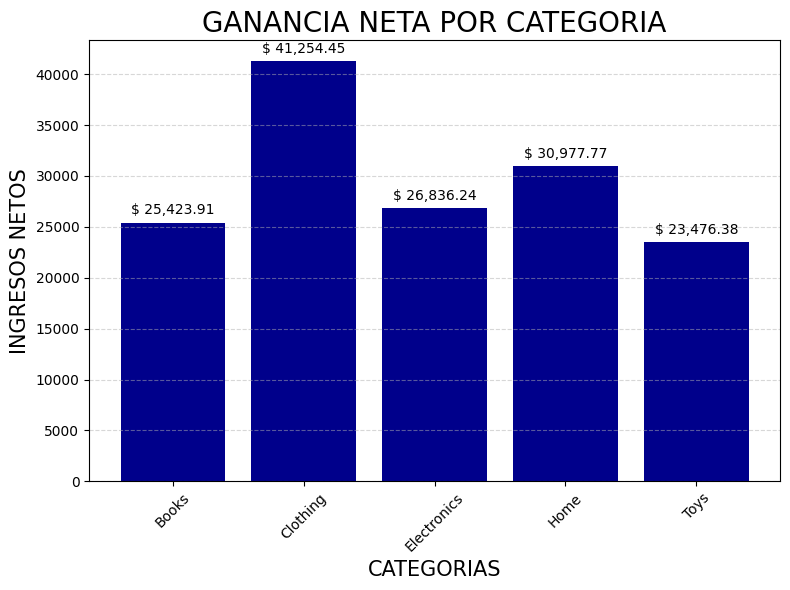

In [19]:

plt.figure(figsize=(8,6))
bars=plt.bar(resumen_categoria['category'], resumen_categoria['ingreso_neto'], color='darkblue')
plt.xlabel('CATEGORIAS',size=15)
plt.ylabel('INGRESOS NETOS',size=15)
plt.title('GANANCIA NETA POR CATEGORIA', size=20)

plt.xticks(rotation=45)
plt.tight_layout()
plt.grid(axis='y',linestyle='--', alpha=0.5)


for bar in bars:
    yval = bar.get_height()
    plt.text( bar.get_x() + bar.get_width() / 2 , yval + 500, f'$ {yval:,.2f}', ha='center',va='bottom',fontsize=10)
plt.show()

In [ ]:
# ####
# 2.	Análisis RFM (Recency, Frequency, Monetary) de Clientes
# o	Clasifica a los clientes según su comportamiento de compra
# o	¿Quiénes son los clientes más valiosos?


In [20]:
#EXTRACCION PASO 2
df_rfm=completed_orders.copy()

In [21]:
dp(df_rfm.head())

,order_id,customer_id,order_date,order_status,shipping_cost,payment_method,total_amount
1,ORD00001,CUST0195,2023-05-25,Completed,4.00,PayPal,663.54
2,ORD00002,CUST0142,2023-07-30,Completed,4.97,Credit Card,51.19
3,ORD00003,CUST0078,2023-02-16,Completed,14.37,Credit Card,327.77
4,ORD00004,CUST0088,2023-04-22,Completed,11.59,Credit Card,398.77
6,ORD00006,CUST0090,2023-02-15,Completed,7.98,Bank Transfer,120.80


In [22]:
#LIMPIAR LA INFORMACION PASO 2
from datetime import timedelta

In [24]:
df_rfm['order_date']=pd.to_datetime(df_rfm['order_date'])

fecha_referencia = df_rfm['order_date'].max() + timedelta(days=1)

In [25]:
#AGRUPAR POR CLIENTE Y CALCULAR RFM
rfm= df_rfm.groupby('customer_id').agg({
    'order_date': lambda x: (fecha_referencia - x.max()).days,# R RECENCY: FRESCURA MENOR ES MEJOR
    'order_id':'count',#F FRECUENCY FRECUENCIA EN LA QUE COMPRA MAYOR ES MEJOR
    'total_amount':'sum'#M MONETARY CUANTO GASTO MAYOR  ES MEJOR
}).reset_index()

In [26]:
dp(rfm)

,customer_id,order_date,order_id,total_amount
0,CUST0000,190,3,1888.30
1,CUST0001,24,3,1265.92
2,CUST0002,65,7,2826.36
3,CUST0003,59,5,1392.31
4,CUST0004,176,5,1945.47
...,...,...,...,...
294,CUST0295,117,5,2601.95
295,CUST0296,54,4,2561.81
296,CUST0297,179,2,940.13
297,CUST0298,49,1,296.15


In [32]:
#ASIGNAR PUNTAJES 5 MEJOR PUNTAJE 1 PEOR PUNTAJE
rfm['R_puntaje']=pd.qcut(rfm['order_date'],5,labels=[5,4,3,2,1])
rfm['F_puntaje']=pd.qcut(rfm['order_id'],5,labels=[1,2,3,4,5])
rfm['M_puntaje']=pd.qcut(rfm['total_amount'],5,labels=[1,2,3,4,5])



In [33]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje
0,CUST0000,190,3,1888.30,1,1,3
1,CUST0001,24,3,1265.92,4,1,2
2,CUST0002,65,7,2826.36,3,5,5
3,CUST0003,59,5,1392.31,3,3,3
4,CUST0004,176,5,1945.47,1,3,4


In [34]:
rfm['RFM_puntaje']= rfm['R_puntaje'].astype(str) + rfm['F_puntaje'].astype(str) + rfm['M_puntaje'].astype(str)

In [35]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje,RFM_puntaje
0,CUST0000,190,3,1888.30,1,1,3,113
1,CUST0001,24,3,1265.92,4,1,2,412
2,CUST0002,65,7,2826.36,3,5,5,355
3,CUST0003,59,5,1392.31,3,3,3,333
4,CUST0004,176,5,1945.47,1,3,4,134


In [42]:
# | Segmento               | R                     | F   | M  |
# | ---------------------- | --------------------- | --- | -- |
# | TOP CLIENTE            | 5                     | 5   | 5  |
# | CLIENTE LEAL           | 3–5                   | 3–5 | ≥3 |
# | CLIENTE EN RIESGO      | ≤2                    | ≥4  | —  |
# | CLIENTE NUEVO          | ≥4                    | ≤2  | ≤2 |
# | CLIENTE PERDIDO        | ≤2                    | ≤2  | ≤2 |
# | CLIENTE BAJO POTENCIAL | todos los demás casos |     |    |


def segmentacion_cliente(rfm):
    r=int(rfm['R_puntaje'])
    f=int(rfm['F_puntaje'])
    m=int(rfm['M_puntaje'])

    if (r == 5) and (f == 5) and (m == 5):
        return 'TOP CLIENTE'
    elif r >= 3 and f >= 3 and m >=3:
        return 'CLIENTE LEAL'
    elif r >= 4 and  f <= 2:
        return 'CLIENTE NUEVO'
    elif r <= 2 and f >= 4:
        return 'CLIENTE EN RIESGO'
    elif f <= 2 and m <= 2:
        return 'CLIENTE PERDIDO'
    else:
        return 'CLIENTE BAJO POTENCIAL'
    

In [43]:
rfm['Clasificar']=rfm.apply(segmentacion_cliente,axis=1)

In [44]:
dp(rfm.head())

,customer_id,order_date,order_id,total_amount,R_puntaje,F_puntaje,M_puntaje,RFM_puntaje,Clasificar
0,CUST0000,190,3,1888.30,1,1,3,113,CLIENTE BAJO POTENCIAL
1,CUST0001,24,3,1265.92,4,1,2,412,CLIENTE NUEVO
2,CUST0002,65,7,2826.36,3,5,5,355,CLIENTE LEAL
3,CUST0003,59,5,1392.31,3,3,3,333,CLIENTE LEAL
4,CUST0004,176,5,1945.47,1,3,4,134,CLIENTE BAJO POTENCIAL


In [46]:

resumen_segmentos = rfm['Clasificar'].value_counts().reset_index()
resumen_segmentos.columns = ['Clasificacion', 'Cantidad']
dp(resumen_segmentos)



,Clasificacion,Cantidad
0,CLIENTE LEAL,91
1,CLIENTE PERDIDO,87
2,CLIENTE NUEVO,50
3,CLIENTE BAJO POTENCIAL,46
4,CLIENTE EN RIESGO,16
5,TOP CLIENTE,9


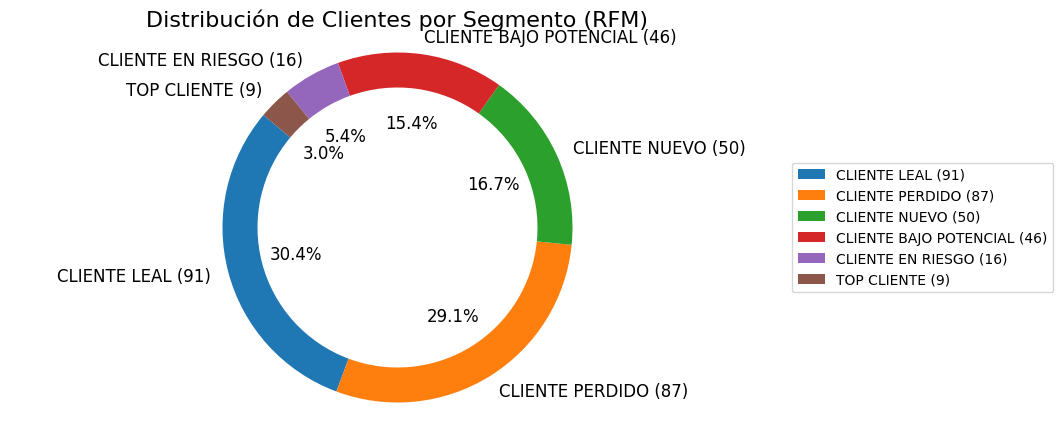

In [57]:

plt.figure(figsize=(10,5))
plt.pie(resumen_segmentos['Cantidad'], 
        labels=[f"{label} ({count})" for label, count in zip(resumen_segmentos['Clasificacion'], resumen_segmentos['Cantidad'])],
        autopct='%1.1f%%',
        startangle=140,
        shadow=False,
        textprops={'fontsize': 12},
        wedgeprops={'width':0.2}
)
    
plt.title('Distribución de Clientes por Segmento (RFM)', fontsize=16)
plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5), fontsize=10)
plt.axis('equal')
plt.show()

In [59]:
clientes_valiosos=rfm[rfm['Clasificar'].isin(['TOP CLIENTE', 'CLIENTE LEAL', 'CLIENTE NUEVO'])]

In [62]:
clientes_valiosos=clientes_valiosos[['customer_id']]

In [63]:
dp(clientes_valiosos)

,customer_id
1,CUST0001
2,CUST0002
3,CUST0003
9,CUST0009
12,CUST0012
...,...
287,CUST0288
288,CUST0289
289,CUST0290
292,CUST0293


In [ ]:
# 3.	Detección de Productos con Baja Rentabilidad o Alta Tasa de Devolución
# o	¿Qué productos o categorías tienen más devoluciones?
# o	¿Cuáles generan pérdidas?
